In [5]:
import pandas as pd
summary_statistics = pd.read_table('Summary_statistics.gz', sep='\t')
import scipy.stats
summary_statistics['P'] = summary_statistics['z'].apply(lambda z: 2 * scipy.stats.norm.sf(abs(z)))

In [33]:
import os
# os.chdir('DAPG/')
Brain_files = [f for f in os.listdir('.') if 'Brain' in f]
Brain_merge50 = pd.DataFrame(columns=['chr', 'bp', 'ref', 'alt'])
Brain_merge20 = pd.DataFrame(columns=['chr', 'bp', 'ref', 'alt'])
Brain_merge0 = pd.DataFrame(columns=['chr', 'bp', 'ref', 'alt'])
for f in Brain_files:
    Brain_PIP50 = pd.read_table(f, sep='\t')
    Brain_PIP50['chr'] = Brain_PIP50['variant_id'].apply(lambda x: x.split('_')[0])
    Brain_PIP50['bp'] = Brain_PIP50['variant_id'].apply(lambda x: int(x.split('_')[1]))
    Brain_PIP50['ref'] = Brain_PIP50['variant_id'].apply(lambda x: x.split('_')[2])
    Brain_PIP50['alt'] = Brain_PIP50['variant_id'].apply(lambda x: x.split('_')[3])
    Brain_PIP50 = Brain_PIP50[Brain_PIP50['pip'] > 0.5][['chr', 'bp', 'ref', 'alt']] # select SNPs with PIP > 0.5 in at least one brain tissue (to see the distribution of their p-values)
    Brain_merge50 = pd.merge(Brain_merge50, Brain_PIP50, on=['chr', 'bp', 'ref', 'alt'], how='outer')
    
for f in Brain_files:
    Brain_PIP20 = pd.read_table(f, sep='\t')
    Brain_PIP20['chr'] = Brain_PIP20['variant_id'].apply(lambda x: x.split('_')[0])
    Brain_PIP20['bp'] = Brain_PIP20['variant_id'].apply(lambda x: int(x.split('_')[1]))
    Brain_PIP20['ref'] = Brain_PIP20['variant_id'].apply(lambda x: x.split('_')[2])
    Brain_PIP20['alt'] = Brain_PIP20['variant_id'].apply(lambda x: x.split('_')[3])
    Brain_PIP20 = Brain_PIP20[Brain_PIP20['pip'] > 0.2][['chr', 'bp', 'ref', 'alt']] # select SNPs with PIP > 0.2 in at least one brain tissue (to see the distribution of their p-values)
    Brain_merge20 = pd.merge(Brain_merge20, Brain_PIP20, on=['chr', 'bp', 'ref', 'alt'], how='outer')

for f in Brain_files:
    Brain_PIP0 = pd.read_table(f, sep='\t')
    Brain_PIP0['chr'] = Brain_PIP0['variant_id'].apply(lambda x: x.split('_')[0])
    Brain_PIP0['bp'] = Brain_PIP0['variant_id'].apply(lambda x: int(x.split('_')[1]))
    Brain_PIP0['ref'] = Brain_PIP0['variant_id'].apply(lambda x: x.split('_')[2])
    Brain_PIP0['alt'] = Brain_PIP0['variant_id'].apply(lambda x: x.split('_')[3])
    Brain_PIP0 = Brain_PIP0[Brain_PIP0['pip'] > 0.0][['chr', 'bp', 'ref', 'alt']] # select SNPs with PIP > 0.2 in at least one brain tissue (to see the distribution of their p-values)
    Brain_merge0 = pd.merge(Brain_merge0, Brain_PIP0, on=['chr', 'bp', 'ref', 'alt'], how='outer')
    
Brain_merge50.drop_duplicates(subset=['chr', 'bp', 'ref', 'alt'], keep='first', inplace=True)
Brain_merge20.drop_duplicates(subset=['chr', 'bp', 'ref', 'alt'], keep='first', inplace=True)
Brain_merge0.drop_duplicates(subset=['chr', 'bp', 'ref', 'alt'], keep='first', inplace=True)
SNPs_Brain50 = pd.merge(summary_statistics, Brain_merge50, on=['chr', 'bp'], how='inner') # obtain the P-values of the brain eQTL SNPs
SNPs_Brain20 = pd.merge(summary_statistics, Brain_merge20, on=['chr', 'bp'], how='inner')
SNPs_Brain0 = pd.merge(summary_statistics, Brain_merge0, on=['chr', 'bp'], how='inner')
P_values_Brain50 = SNPs_Brain50['P']
P_values_Brain20 = SNPs_Brain20['P']
P_values_Brain0 = SNPs_Brain0['P']
P_values_full = summary_statistics['P']
# import matplotlib.pyplot as plt
# plt.hist(P_values_Brain, bins=30)
# plt.xlabel('P-values')
# plt.ylabel('Frequency')
# plt.title('Brain')
# plt.show()
import statsmodels.api as sm
import numpy as np
import math
# sm.qqplot_2samples(data1=np.array([-math.log10(x) for x in P_values_Brain50]), data2=np.array([-math.log10(x) for x in np.random.uniform(size=len(P_values_Brain50))]), xlabel='Expected -log10(GWAS P-value)', ylabel='Observed -log10(GWAS P-value)', line='45')
# sm.qqplot_2samples(data1=np.array([-math.log10(x) for x in P_values_Brain20]), data2=np.array([-math.log10(x) for x in np.random.uniform(size=len(P_values_Brain20))]), xlabel='Expected -log10(GWAS P-value)', ylabel='Observed -log10(GWAS P-value)', line='45')
# sm.qqplot_2samples(data1=np.array([-math.log10(x) for x in P_values_full]), data2=np.array([-math.log10(x) for x in np.random.uniform(size=len(P_values_full))]), xlabel='Expected -log10(GWAS P-value)', ylabel='Observed -log10(GWAS P-value)', line='45')


In [38]:
P_values_Brain0[P_values_Brain0 < 1e-5]

137    1.722001e-11
140    3.409006e-13
142    3.907993e-13
147    2.720990e-14
Name: P, dtype: float64

In [34]:
import matplotlib.lines as mlines

In [64]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['lines.markersize'] ** 2

36.0

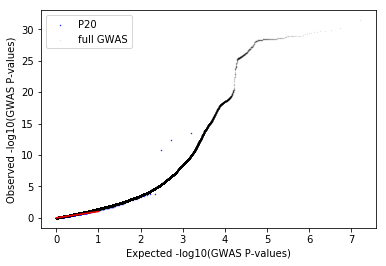

In [67]:
samp50_pct_x = np.array([-math.log10((i + 0.5) / len(P_values_Brain50)) for i in reversed(list(range(len(P_values_Brain50))))])
samp50_pct_y = np.array(sorted([-math.log10(x) for x in P_values_Brain50]))

samp20_pct_x = np.array([-math.log10((i + 0.5) / len(P_values_Brain20)) for i in reversed(list(range(len(P_values_Brain20))))])
samp20_pct_y = np.array(sorted([-math.log10(x) for x in P_values_Brain20]))

samp0_pct_x = np.array([-math.log10((i + 0.5) / len(P_values_Brain0)) for i in reversed(list(range(len(P_values_Brain0))))])
samp0_pct_y = np.array(sorted([-math.log10(x) for x in P_values_Brain0]))

samp_pct_x = np.array([-math.log10((i + 0.5) / len(P_values_full)) for i in reversed(list(range(len(P_values_full))))])
samp_pct_y = np.array(sorted([-math.log10(x) for x in P_values_full])) # the bug is because there are 0s in P_values_full. Probably the solution is to improve the precision of decimals to avoid 0s!

# QQ plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# P50 = ax.scatter(x=samp50_pct_x, y=samp50_pct_y, c='orange')
P20 = ax.scatter(x=samp20_pct_x, y=samp20_pct_y, c='blue', s=.2)
# P0 = ax.scatter(x=samp0_pct_x, y=samp0_pct_y, c='grey')
P = ax.scatter(x=samp_pct_x, y=samp_pct_y, c='black', s=.2, alpha=0.1)
line = mlines.Line2D(xdata=[0, 7], ydata=[0, 7], color='red')
ax.add_line(line)
ax.legend((P20, P), ('P20', 'full GWAS'), loc='upper left')
plt.xlabel('Expected -log10(GWAS P-values)')
plt.ylabel('Observed -log10(GWAS P-values)')
plt.show()


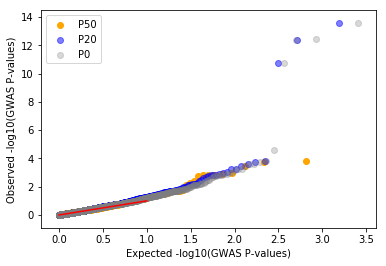

In [57]:
fig, ax = plt.subplots()
P50 = ax.scatter(x=samp50_pct_x, y=samp50_pct_y, c='orange')
P20 = ax.scatter(x=samp20_pct_x, y=samp20_pct_y, c='blue', alpha=0.5)
P0 = ax.scatter(x=samp0_pct_x, y=samp0_pct_y, c='grey', alpha=0.3)
line = mlines.Line2D(xdata=[0, 7], ydata=[0, 7], color='red')
ax.add_line(line)
ax.legend((P50, P20, P0), ('P50', 'P20', 'P0'), loc='upper left')
plt.xlabel('Expected -log10(GWAS P-values)')
plt.ylabel('Observed -log10(GWAS P-values)')
plt.show()
